In [1]:
# Create or activate the virtual environment and install dependencies
import os

# Suppress output using redirect
def silent_install(cmd):
    os.system(f"{cmd} > /dev/null 2>&1")

# Create the virtual environment if it doesn't exist
if not os.path.exists("env"):
    silent_install("python -m venv env")

# Activate the virtual environment and install requirements
silent_install("env/bin/python -m pip install --upgrade pip")
silent_install("env/bin/python -m pip install yfinance seaborn pandas_datareader")

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

In [23]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-11-22       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-25       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-26       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-27       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-29       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-04       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-05       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   

Price      High  ...       Low Open Volume   Adj Close       Close  \
Ticker     GOOG  ... MSFT MSFT MSFT   MSFT        AMZN        AMZN   
Date             ...                                                 
2024-11-22  NaN  ...  NaN  NaN  NaN    NaN  197.119995  197.119995   
2024-11-25  NaN  ...  NaN  NaN  NaN    NaN  201.449997  201.449997   
2024-11-26  NaN  ...  NaN  NaN  NaN    NaN  207.860001  207.860001   
2024-11-27  NaN  ...  NaN  NaN  NaN    NaN  205.740005  205.740005   
2024-11-29  NaN  ...  NaN  NaN  NaN    NaN  207.889999  207.889999   
2024-12-02  NaN  ...  NaN  NaN  NaN    NaN  210.710007  210.710007   
2024-12-03  NaN  ...  NaN  NaN  NaN    NaN  213.440002  213.440002   
2024-12-04  NaN  ...  NaN  NaN  NaN    NaN  218.160004  218.160004   
2024-12-05  NaN  ...  NaN  NaN  NaN    NaN  220.550003  220.550003   
2024-12-06  NaN  ...  NaN  NaN  NaN    NaN  227.029999  227.029999   

Price             High         Low        Open      Volume  
Ticker            AMZN        AMZN        AMZN        AMZN  
Date                                                        
2024-11-22  199.259995  196.750000  198.250000  31530800.0  
2024-11-25  201.949997  199.000000  199.279999  40685700.0  
2024-11-26  208.000000  201.789993  201.899994  41673700.0  
2024-11-27  207.639999  205.050003  206.979996  28061600.0  
2024-11-29  208.199997  204.589996  205.830002  24892400.0  
2024-12-02  212.990005  209.509995  209.960007  39523200.0  
2024-12-03  214.020004  209.649994  210.309998  32214800.0  
2024-12-04  220.000000  215.750000  215.960007  48745700.0  
2024-12-05  222.149994  217.300003  218.029999  41140200.0  
2024-12-06  227.149994  220.600006  220.750000  44123400.0  

[10 rows x 25 columns]

In [19]:
# Summary Stats
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,203.118886,203.615079,205.280199,201.708413,203.425039,5.750956e+07
std,23.014869,22.823275,22.945116,22.474957,22.726478,3.047193e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.452488,184.224998,185.134995,182.204998,183.827499,4.209502e+07
50%,197.069550,198.035004,199.009995,195.945000,197.214996,5.013555e+07
75%,225.646748,225.895000,227.282497,223.330006,225.162498,6.372982e+07
max,243.039993,243.039993,244.630005,242.130005,243.990005,3.186799e+08


In [24]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-12-07 to 2024-12-06
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  755 non-null    float64
 1   (Close, AAPL)      755 non-null    float64
 2   (High, AAPL)       755 non-null    float64
 3   (Low, AAPL)        755 non-null    float64
 4   (Open, AAPL)       755 non-null    float64
 5   (Volume, AAPL)     755 non-null    int64  
 6   (company_name, )   755 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB


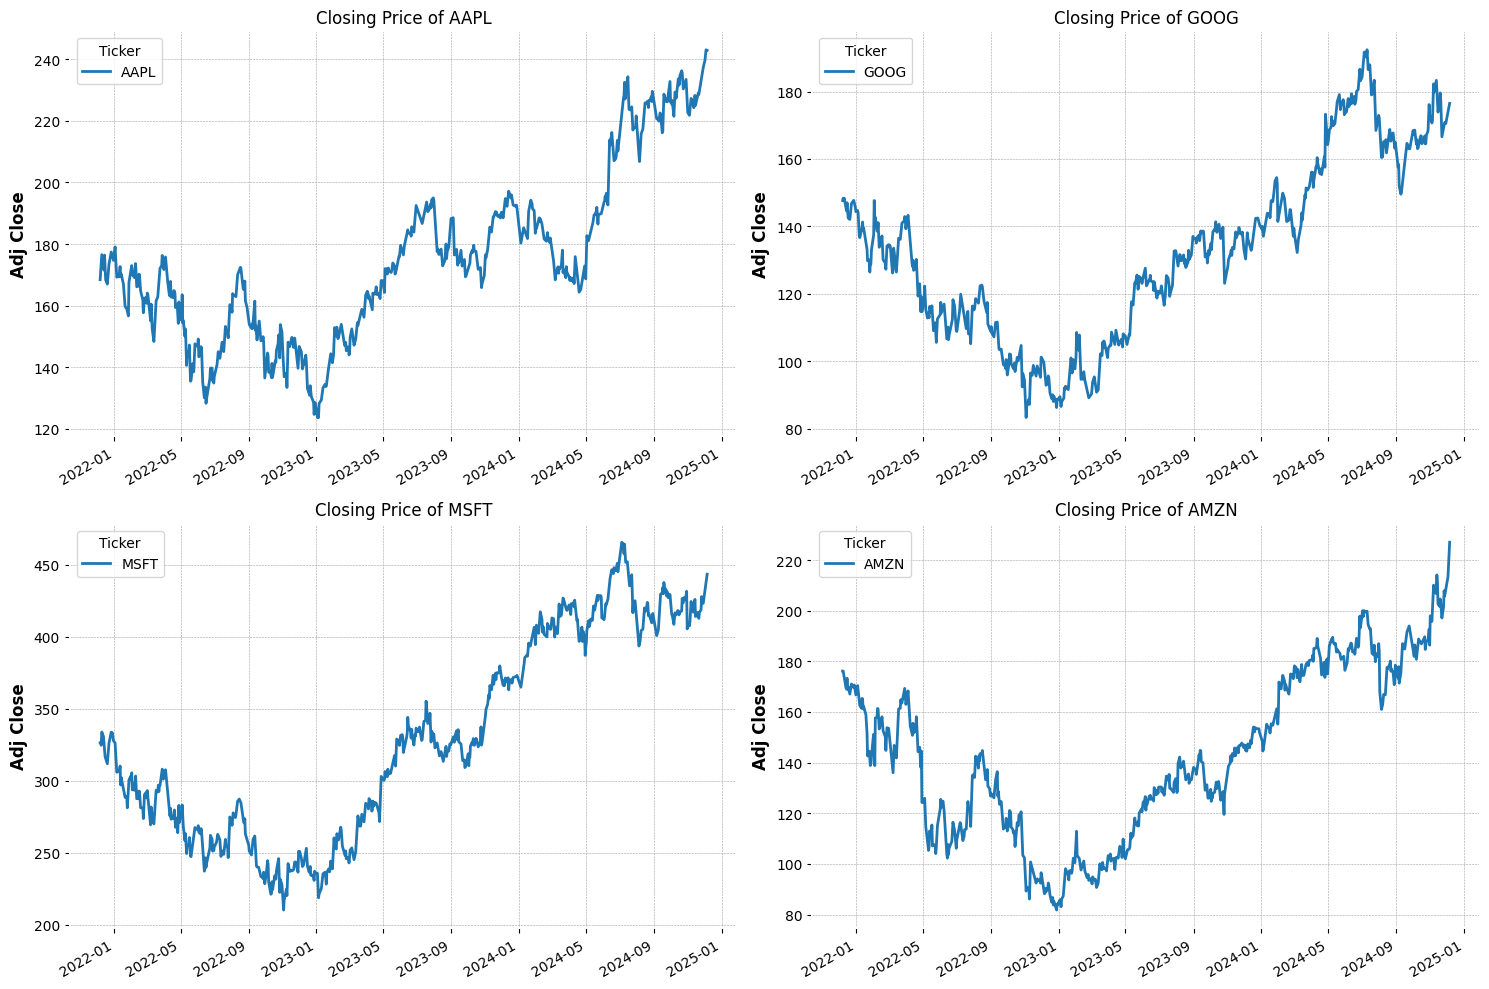

In [25]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Adj Close'].plot(ax=ax)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

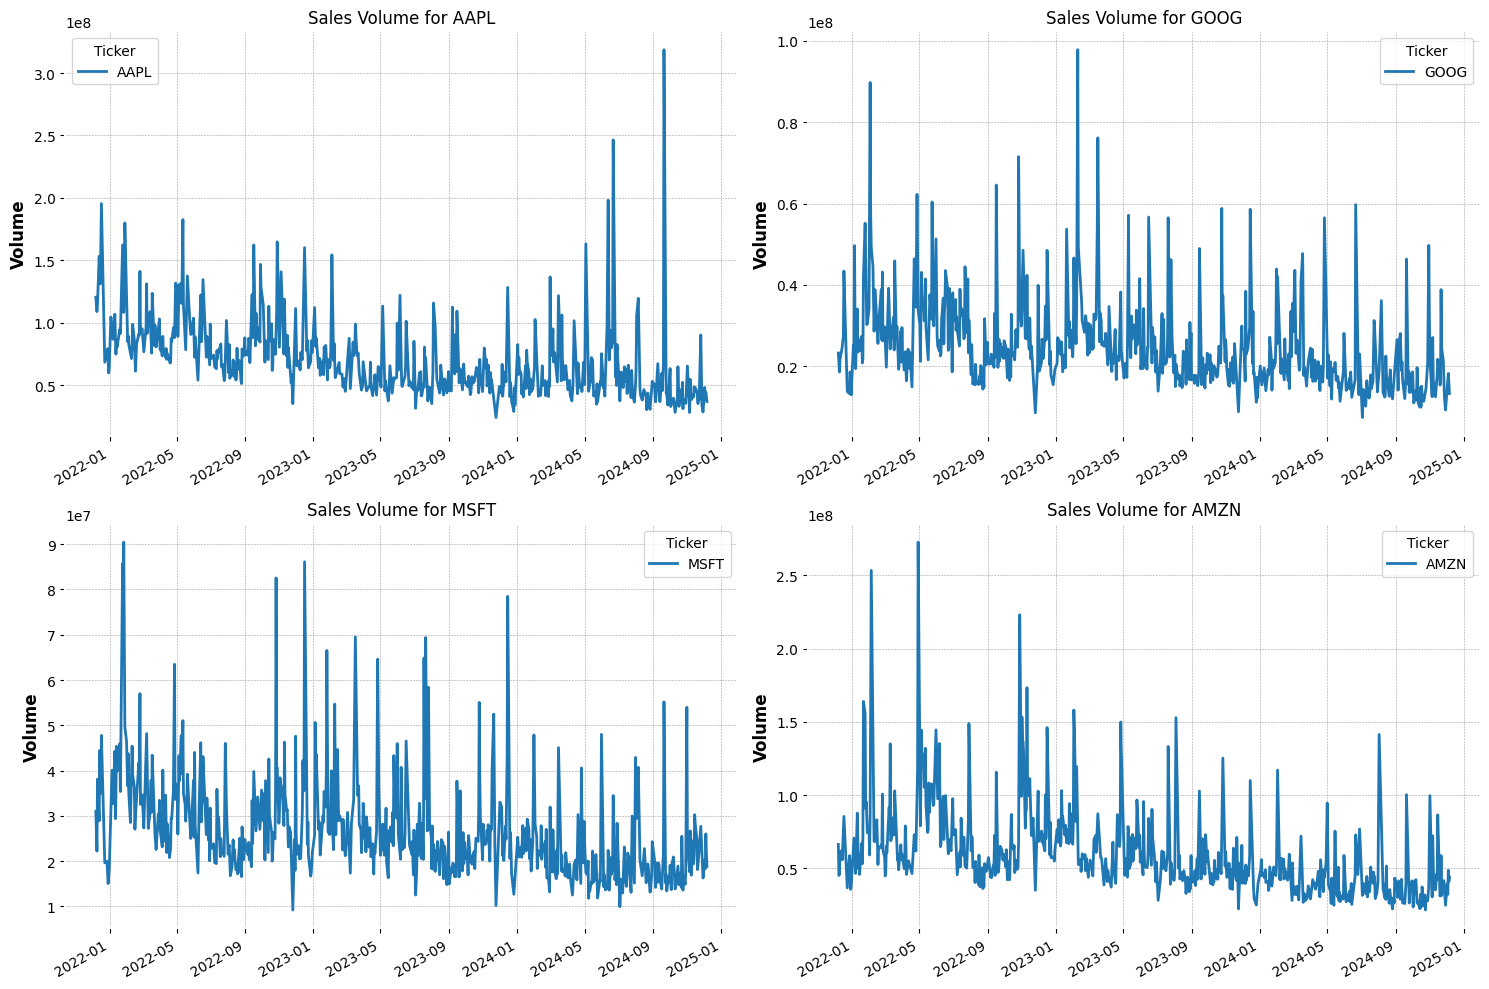

In [26]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Volume'].plot(ax=ax)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

In [34]:
import mplfinance as mpf
import pandas as pd
import numpy as np

# List of EMA and SMA periods
ema_periods = [8, 21, 34, 55, 89]
sma_periods = [50, 100, 200]

# Titles for plot legend
ema_titles = [f"{period}-days EMA" for period in ema_periods]
sma_titles = [f"{period}-days SMA" for period in sma_periods]

# Define colors for each moving average
ema_colors = ['red', 'orange', 'yellow', 'green', 'blue']
sma_colors = ['purple', 'brown', 'black']

# Define valid line styles for EMAs
ema_styles = ['dotted', 'dashdot', 'dashed', 'dotted', 'solid']
sma_thickness = [1, 2, 3]  # Thickness levels for SMAs

# Enable interactive zooming
%matplotlib notebook

# Function to clean and flatten the DataFrame
def clean_and_flatten_data(df, ticker):
    # Extract the data for the given ticker from the MultiIndex
    df = df.xs(ticker, level='Ticker', axis=1)
    
    # Ensure required columns are present
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}")
    
    # Drop rows with NaN in required columns
    df = df.dropna(subset=required_columns)
    
    # Ensure all numeric columns are of numeric type
    df[required_columns] = df[required_columns].apply(pd.to_numeric, errors='coerce')
    
    return df

# Plot function with candlestick chart and indicators
def plot_candlestick_with_indicators(df, title, ticker):
    # Clean and flatten the data
    df = clean_and_flatten_data(df, ticker)
    
    # Add moving averages as additional columns to the DataFrame
    for period in ema_periods:
        df[f"{period}-days EMA"] = df['Close'].ewm(span=period, adjust=False).mean()
    for period in sma_periods:
        df[f"{period}-days SMA"] = df['Close'].rolling(window=period).mean()
    
    # Prepare the moving averages dictionary for mplfinance
    add_plots = []
    
    # Add EMAs with specified line styles
    for title, color, style in zip(ema_titles, ema_colors, ema_styles):
        if title in df.columns:
            add_plots.append(mpf.make_addplot(df[title], color=color, linestyle=style, width=1.5))
    
    # Add SMAs with varying thickness
    for title, color, thickness in zip(sma_titles, sma_colors, sma_thickness):
        if title in df.columns:
            add_plots.append(mpf.make_addplot(df[title], color=color, linestyle='solid', width=thickness))
    
    # Plot candlestick chart with indicators
    mpf.plot(
        df,
        type='candle',
        style='charles',
        title=title,  # Use the company name as the title
        ylabel='Price',
        volume=True,
        addplot=add_plots,
        figsize=(12, 8),
        warn_too_much_data=len(df) + 1,  # Suppress warning for data size
    )

# Replace the companies dictionary with actual DataFrame objects and correct tickers
companies = {
    "Apple": "AAPL",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Amazon": "AMZN"
}

# Plot for each company
for company_name, ticker in companies.items():
    plot_candlestick_with_indicators(eval(ticker), company_name, ticker)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()  # Enable interactive mode

[*********************100%***********************]  1 of 1 completed
C:\Users\ellen\AppData\Local\Temp\ipykernel_28000\277607165.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit the rotated labels


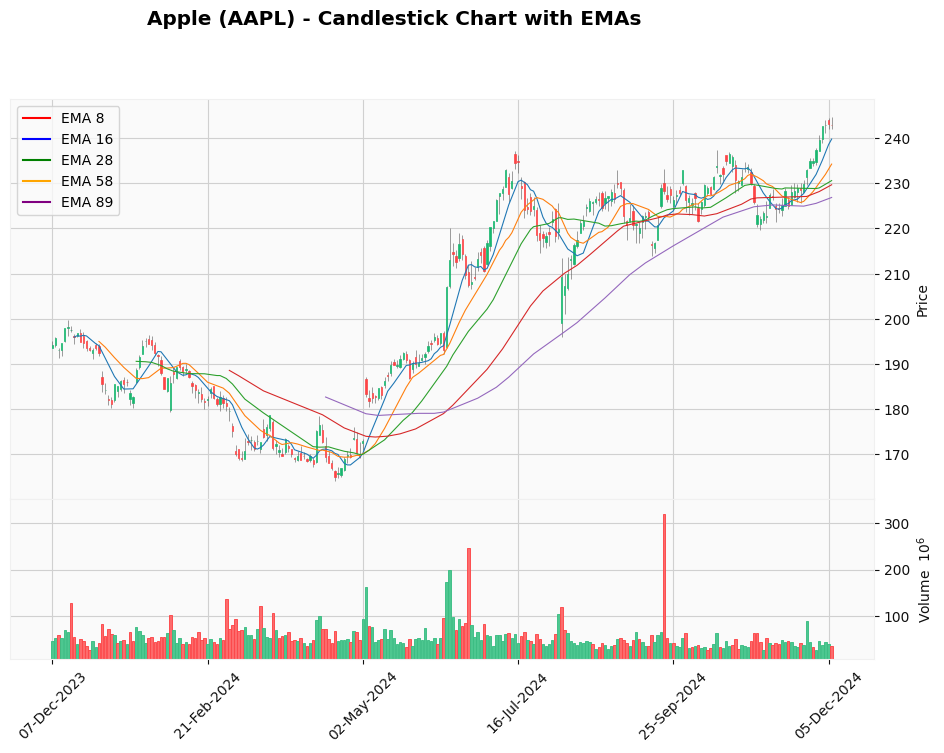

In [15]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt

# Define stock and time range
stock = "AAPL"
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data
AAPL = yf.download(stock, start, end)

# Flatten the column index if multi-level
AAPL.columns = [col[0] if isinstance(col, tuple) else col for col in AAPL.columns]

# Calculate Exponential Moving Averages (EMAs)
ema_days = [8, 16, 28, 58, 89]
for ema in ema_days:
    AAPL[f"EMA_{ema}"] = AAPL['Adj Close'].ewm(span=ema, adjust=False).mean()

# Select relevant columns for plotting
plot_data = AAPL[['Open', 'High', 'Low', 'Close', 'Volume'] + [f"EMA_{ema}" for ema in ema_days]].dropna()

# Convert columns to numeric (just in case)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plot_data[numeric_columns] = plot_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot the candlestick chart
fig, axlist = mpf.plot(
    plot_data,
    type='candle',  # Candlestick chart
    mav=ema_days,  # Add EMAs
    volume=True,  # Include volume bars
    title=f"Apple (AAPL) - Candlestick Chart with EMAs",
    style='yahoo',  # Predefined style
    figsize=(12, 8),
    returnfig=True  # Return figure for further customization
)

# Customize the x-axis to show only 6 evenly spaced dates
ax = axlist[0]  # Main chart axis
xticks_positions = list(range(0, len(plot_data.index), len(plot_data.index) // 5))  # 5 intervals = 6 labels
xticks_labels = [plot_data.index[i].strftime("%d-%b-%Y") for i in xticks_positions]

ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

# Add the legend manually using matplotlib
legend_handles = [
    plt.Line2D([], [], color=color, label=f"EMA {ema}")
    for color, ema in zip(['red', 'blue', 'green', 'orange', 'purple'], ema_days)
]
ax.legend(handles=legend_handles, loc="best")

plt.tight_layout()  # Adjust layout to fit the rotated labels
plt.show()